# ML_SP22_Project_2 (Classical Machine Learning Model Building)

### Due Date: 5/2 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

### Original dataset was based on
https://archive.ics.uci.edu/ml/datasets/wine+quality

Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

### However, we will be using a slightly modified version of the dataset as follow

In [3]:
df = pd.read_csv("wine-tasting.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,normal
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,normal
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,normal
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,normal


<AxesSubplot:xlabel='taste', ylabel='count'>

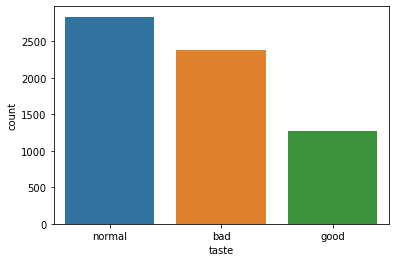

In [5]:
sns.countplot(x='taste',data=df)

<AxesSubplot:xlabel='taste', ylabel='count'>

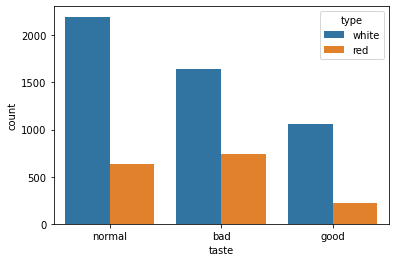

In [6]:
sns.countplot(x='taste', hue='type', data=df)

### Your task in this Project is to build the best predictive model to predict if a wine will be of good taste (ie we do not care if it is normal or bad taste, just good vs not good taste)

***You should follow the usual best practice in building models such as***

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least three (one of them is your own decision tree) models and checked their model performance
* performed cross-validations (f1-score)

In [4]:
# For this i'm assign all normal,bad taste as a not good value because in our we are only interested on good vs not good

m1=df['taste']=='normal'
m2=df['taste']=='bad'

df['taste'][m1|m2]='not good taste'

In [5]:
df['taste'].unique()    # so we convert multi-class in two classes(binary classification)

array(['not good taste', 'good'], dtype=object)

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,white,very acidic,not good taste
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,white,quite acidic,not good taste
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,white,quite acidic,not good taste
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,not good taste
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,white,very acidic,not good taste


### EDA (chekcing missing values, removing outliers)

In [10]:
# finding the missing values
df.info() # there is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6498 entries, 0 to 6497
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6498 non-null   float64
 2   citric acid           6498 non-null   float64
 3   residual sugar        6498 non-null   float64
 4   chlorides             6498 non-null   float64
 5   free sulfur dioxide   6498 non-null   float64
 6   total sulfur dioxide  6498 non-null   float64
 7   density               6498 non-null   float64
 8   sulphates             6498 non-null   float64
 9   alcohol               6498 non-null   float64
 10  type                  6498 non-null   object 
 11  pHValue               6498 non-null   object 
 12  taste                 6498 non-null   object 
dtypes: float64(10), object(3)
memory usage: 660.1+ KB


In [ ]:
# Creating box plot for see outlier 

<AxesSubplot:>

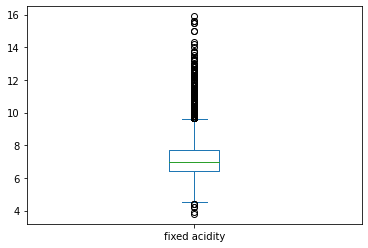

In [11]:
df['fixed acidity'].plot(kind='box')

<AxesSubplot:>

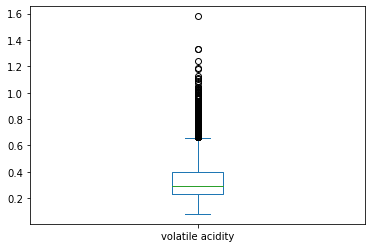

In [12]:
df['volatile acidity'].plot(kind='box')

<AxesSubplot:>

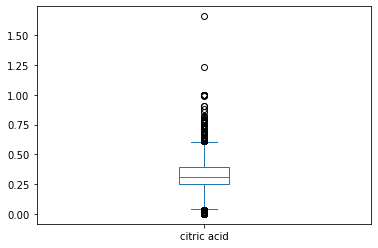

In [17]:
df['citric acid'].plot(kind='box')

<AxesSubplot:>

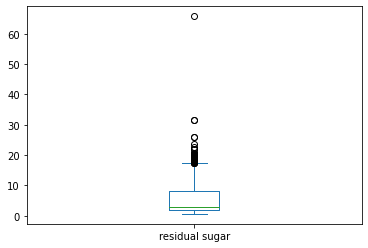

In [16]:
df['residual sugar'].plot(kind='box')

<AxesSubplot:>

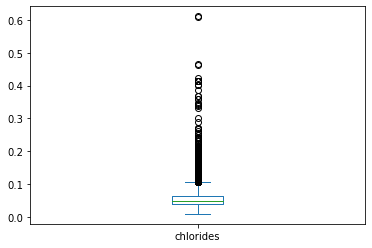

In [15]:
df['chlorides'].plot(kind='box')

<AxesSubplot:>

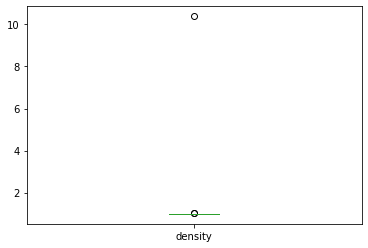

In [14]:
df['density'].plot(kind='box')

<AxesSubplot:>

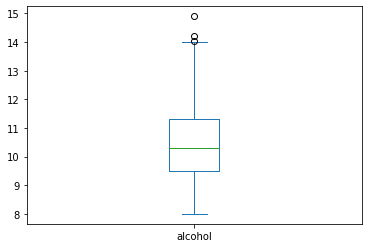

In [13]:
df['alcohol'].plot(kind='box')

<AxesSubplot:>

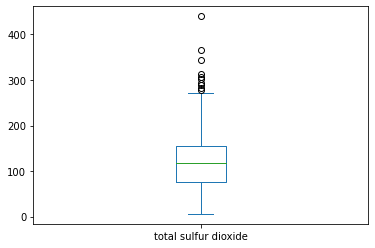

In [20]:
df['total sulfur dioxide'].plot(kind='box')

# Hence we see that every columns have outliers

<AxesSubplot:>

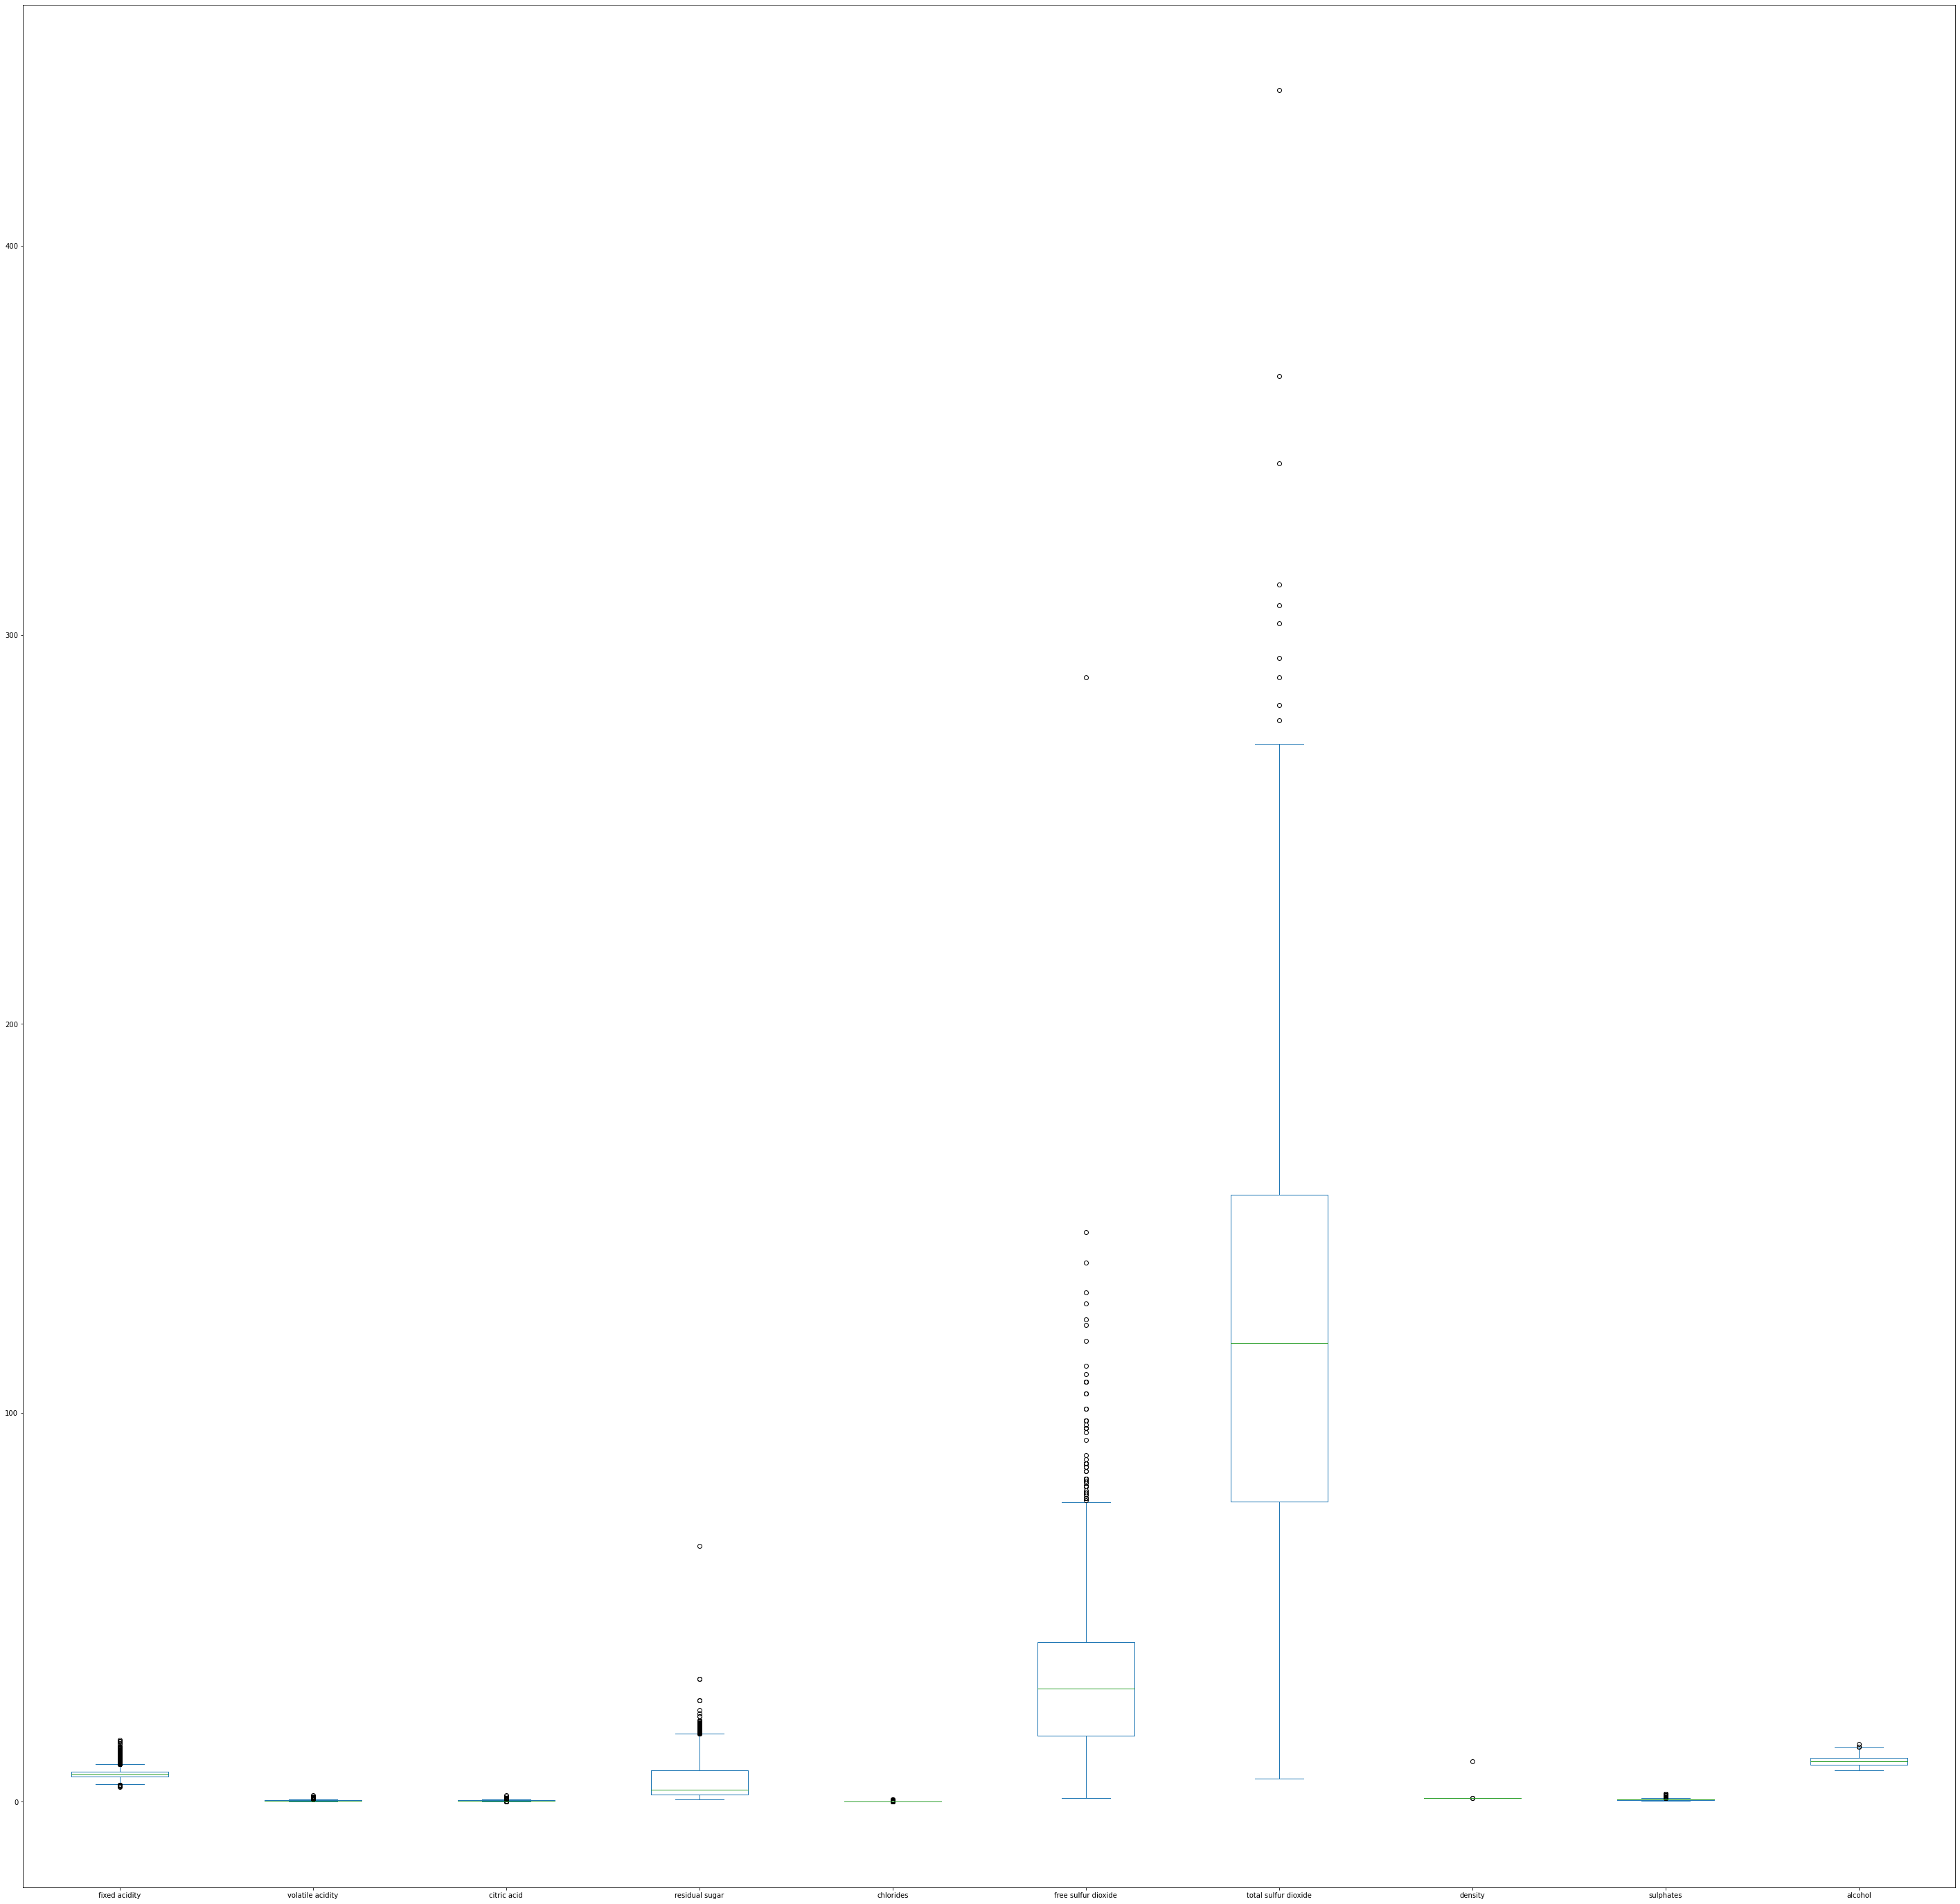

In [18]:
df.plot(kind='box',figsize=(50,50))

In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
count,6497.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000
mean,7.215307,0.339657,0.318650,5.442659,0.056038,30.523853,115.745691,0.996135,0.531251,10.492156
std,1.296434,0.164625,0.145313,4.757664,0.035032,17.748427,56.517576,0.116587,0.148801,1.192964
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.125000,0.992340,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,10.389800,2.000000,14.900000


* i'm using IQR(Interquantile Range) for find and removing outliers because our data is skewed

In [19]:
n_df=df.copy()
cols=df.columns
percentile_25=df[cols].quantile(0.25)
percentile_75=df[cols].quantile(0.75)
for i in range(len(percentile_25)):
    iqr=percentile_75[i]-percentile_25[i]
    upper_limit = percentile_75[i] + (1.5 * iqr)
    lower_limit = percentile_25[i] - (1.5 * iqr)
    upper_outlier=n_df[n_df[cols[i]] > upper_limit]
    lower_outlier=n_df[n_df[cols[i]] < lower_limit]
    print(f'{cols[i]}--> {upper_outlier}, {lower_outlier}--> sum {len(upper_outlier)+len(lower_outlier)}')
    print('---------------------------------------------------------------------------------------------')
    n_df = n_df.drop(n_df[(n_df[cols[i]] > upper_limit) | (n_df[cols[i]] < lower_limit)].index)
    print('Number of Instances after outliers removal: {}'.format(len(n_df)))

fixed acidity-->       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
99              9.8              0.36         0.46           10.50      0.038   
170             9.8              0.42         0.48            9.85      0.034   
208            10.2              0.44         0.88            6.20      0.049   
359            10.0              0.20         0.39            1.40      0.050   
874            10.3              0.17         0.47            1.40      0.037   
...             ...               ...          ...             ...        ...   
6369           10.0              0.69         0.11            1.40      0.084   
6373            9.9              0.50         0.50           13.80      0.205   
6375            9.9              0.50         0.50           13.80      0.205   
6442           11.1              0.44         0.42            2.20      0.064   
6447           11.2              0.40         0.50            2.00      0.099   

      free

In [20]:
n_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
count,5063.000000,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000,5064.000000
mean,6.959658,0.298279,0.315681,5.541005,0.047434,31.885367,124.663112,0.994122,0.505620,10.572511
std,0.883557,0.114949,0.100507,4.489922,0.016350,15.590793,49.806469,0.002781,0.116591,1.195120
min,4.600000,0.080000,0.040000,0.600000,0.009000,2.000000,6.000000,0.987110,0.220000,8.400000
25%,6.400000,0.220000,0.260000,1.800000,0.036000,20.000000,95.000000,0.991840,0.420000,9.500000
50%,6.900000,0.280000,0.310000,3.800000,0.044000,31.000000,125.000000,0.994100,0.490000,10.400000
75%,7.500000,0.350000,0.370000,8.300000,0.054000,42.000000,159.000000,0.996280,0.580000,11.400000
max,9.600000,0.655000,0.600000,17.500000,0.105000,77.000000,272.000000,1.001820,0.850000,14.000000


### Comparison of old Dataframe with outliers and new Dataframe without outliers see the below graphs

<AxesSubplot:>

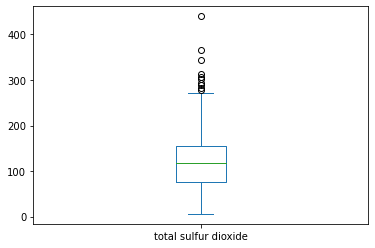

In [23]:
### old Dataframe with outlier

df['total sulfur dioxide'].plot(kind='box')

<AxesSubplot:>

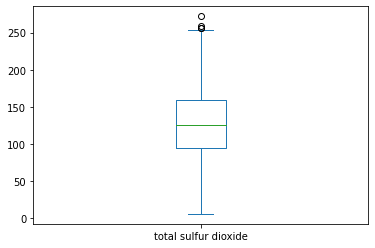

In [22]:
### new Dataframe without outliers
n_df['total sulfur dioxide'].plot(kind='box')

<AxesSubplot:>

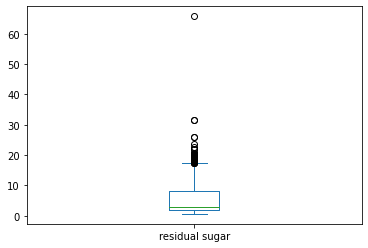

In [26]:
df['residual sugar'].plot(kind='box')

<AxesSubplot:>

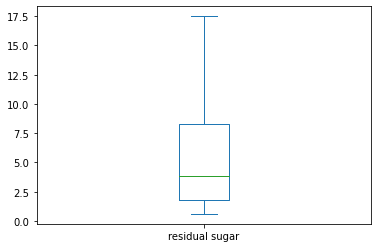

In [25]:
n_df['residual sugar'].plot(kind='box')

<AxesSubplot:>

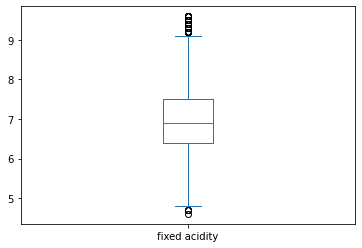

In [27]:
n_df['fixed acidity'].plot(kind='box')

<AxesSubplot:>

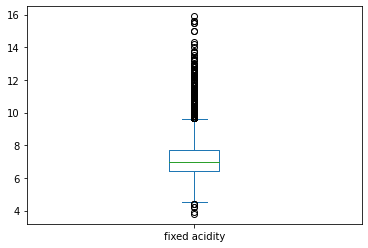

In [28]:
df['fixed acidity'].plot(kind='box')

<AxesSubplot:>

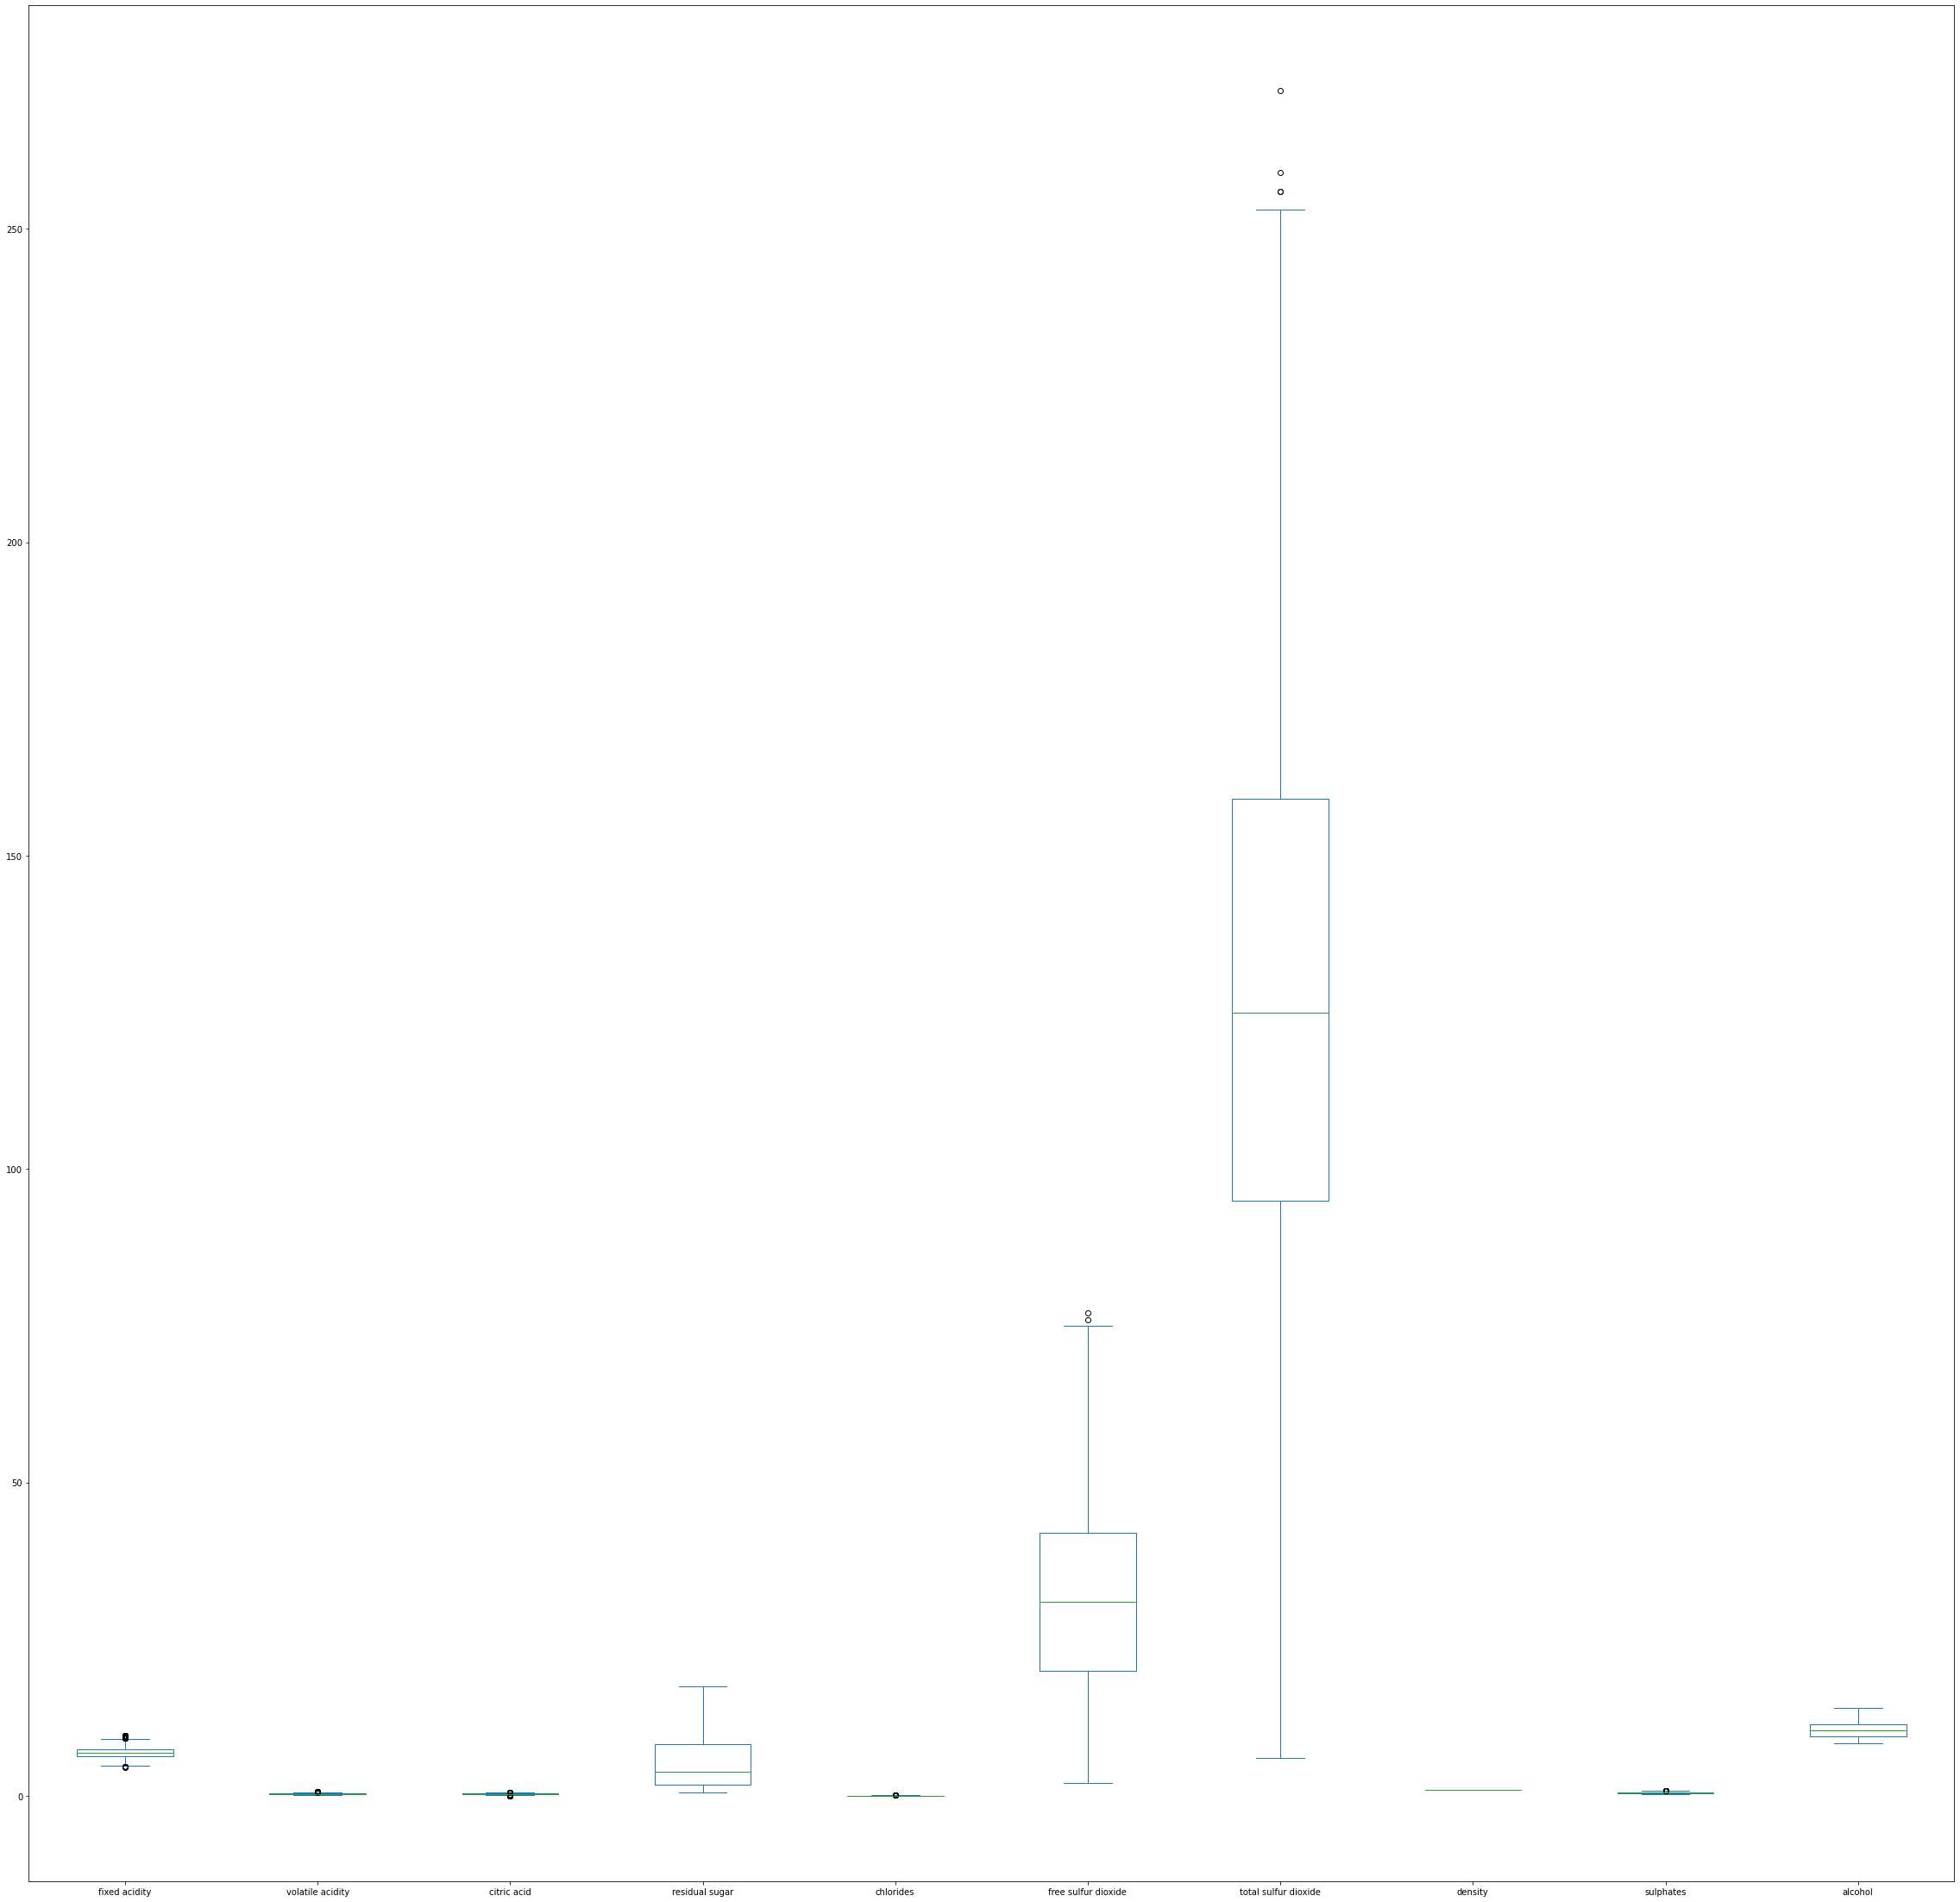

In [24]:
# After removing outliers of all columns

n_df.plot(kind='box',figsize=(40,40))

* performed basic exploration of relationship, with plots and graphs

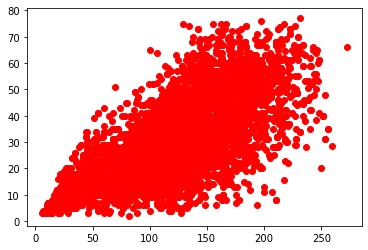

In [29]:
plt.scatter(n_df['total sulfur dioxide'],n_df['free sulfur dioxide'],color='r')

<AxesSubplot:xlabel='taste', ylabel='count'>

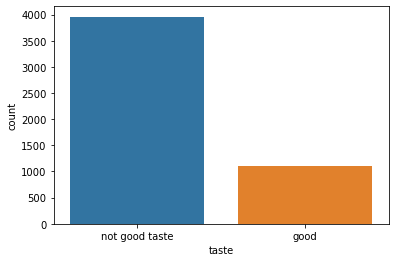

In [30]:
sns.countplot(x='taste',data=n_df)

In [31]:
n_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol
fixed acidity,1.000000,0.148042,0.242327,-0.027444,0.311646,-0.170166,-0.148966,0.344064,0.124389,-0.117339
volatile acidity,0.148042,1.000000,-0.322332,-0.114483,0.428471,-0.283206,-0.267370,0.184433,0.171869,-0.006143
citric acid,0.242327,-0.322332,1.000000,0.097573,-0.117815,0.140648,0.172127,0.030003,0.016174,0.039796
residual sugar,-0.027444,-0.114483,0.097573,1.000000,-0.049479,0.416185,0.473740,0.650712,-0.129733,-0.394283
chlorides,0.311646,0.428471,-0.117815,-0.049479,1.000000,-0.186781,-0.234168,0.522432,0.308908,-0.390104
free sulfur dioxide,-0.170166,-0.283206,0.140648,0.416185,-0.186781,1.000000,0.680371,0.169505,-0.098712,-0.202748
total sulfur dioxide,-0.148966,-0.267370,0.172127,0.473740,-0.234168,0.680371,1.000000,0.230931,-0.159364,-0.328891
density,0.344064,0.184433,0.030003,0.650712,0.522432,0.169505,0.230931,1.000000,0.199588,-0.774647
sulphates,0.124389,0.171869,0.016174,-0.129733,0.308908,-0.098712,-0.159364,0.199588,1.000000,-0.031243
alcohol,-0.117339,-0.006143,0.039796,-0.394283,-0.390104,-0.202748,-0.328891,-0.774647,-0.031243,1.000000


<AxesSubplot:>

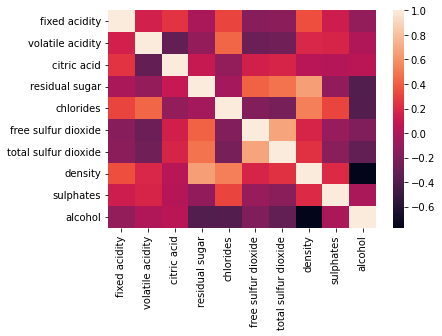

In [32]:
sns.heatmap(n_df.corr())

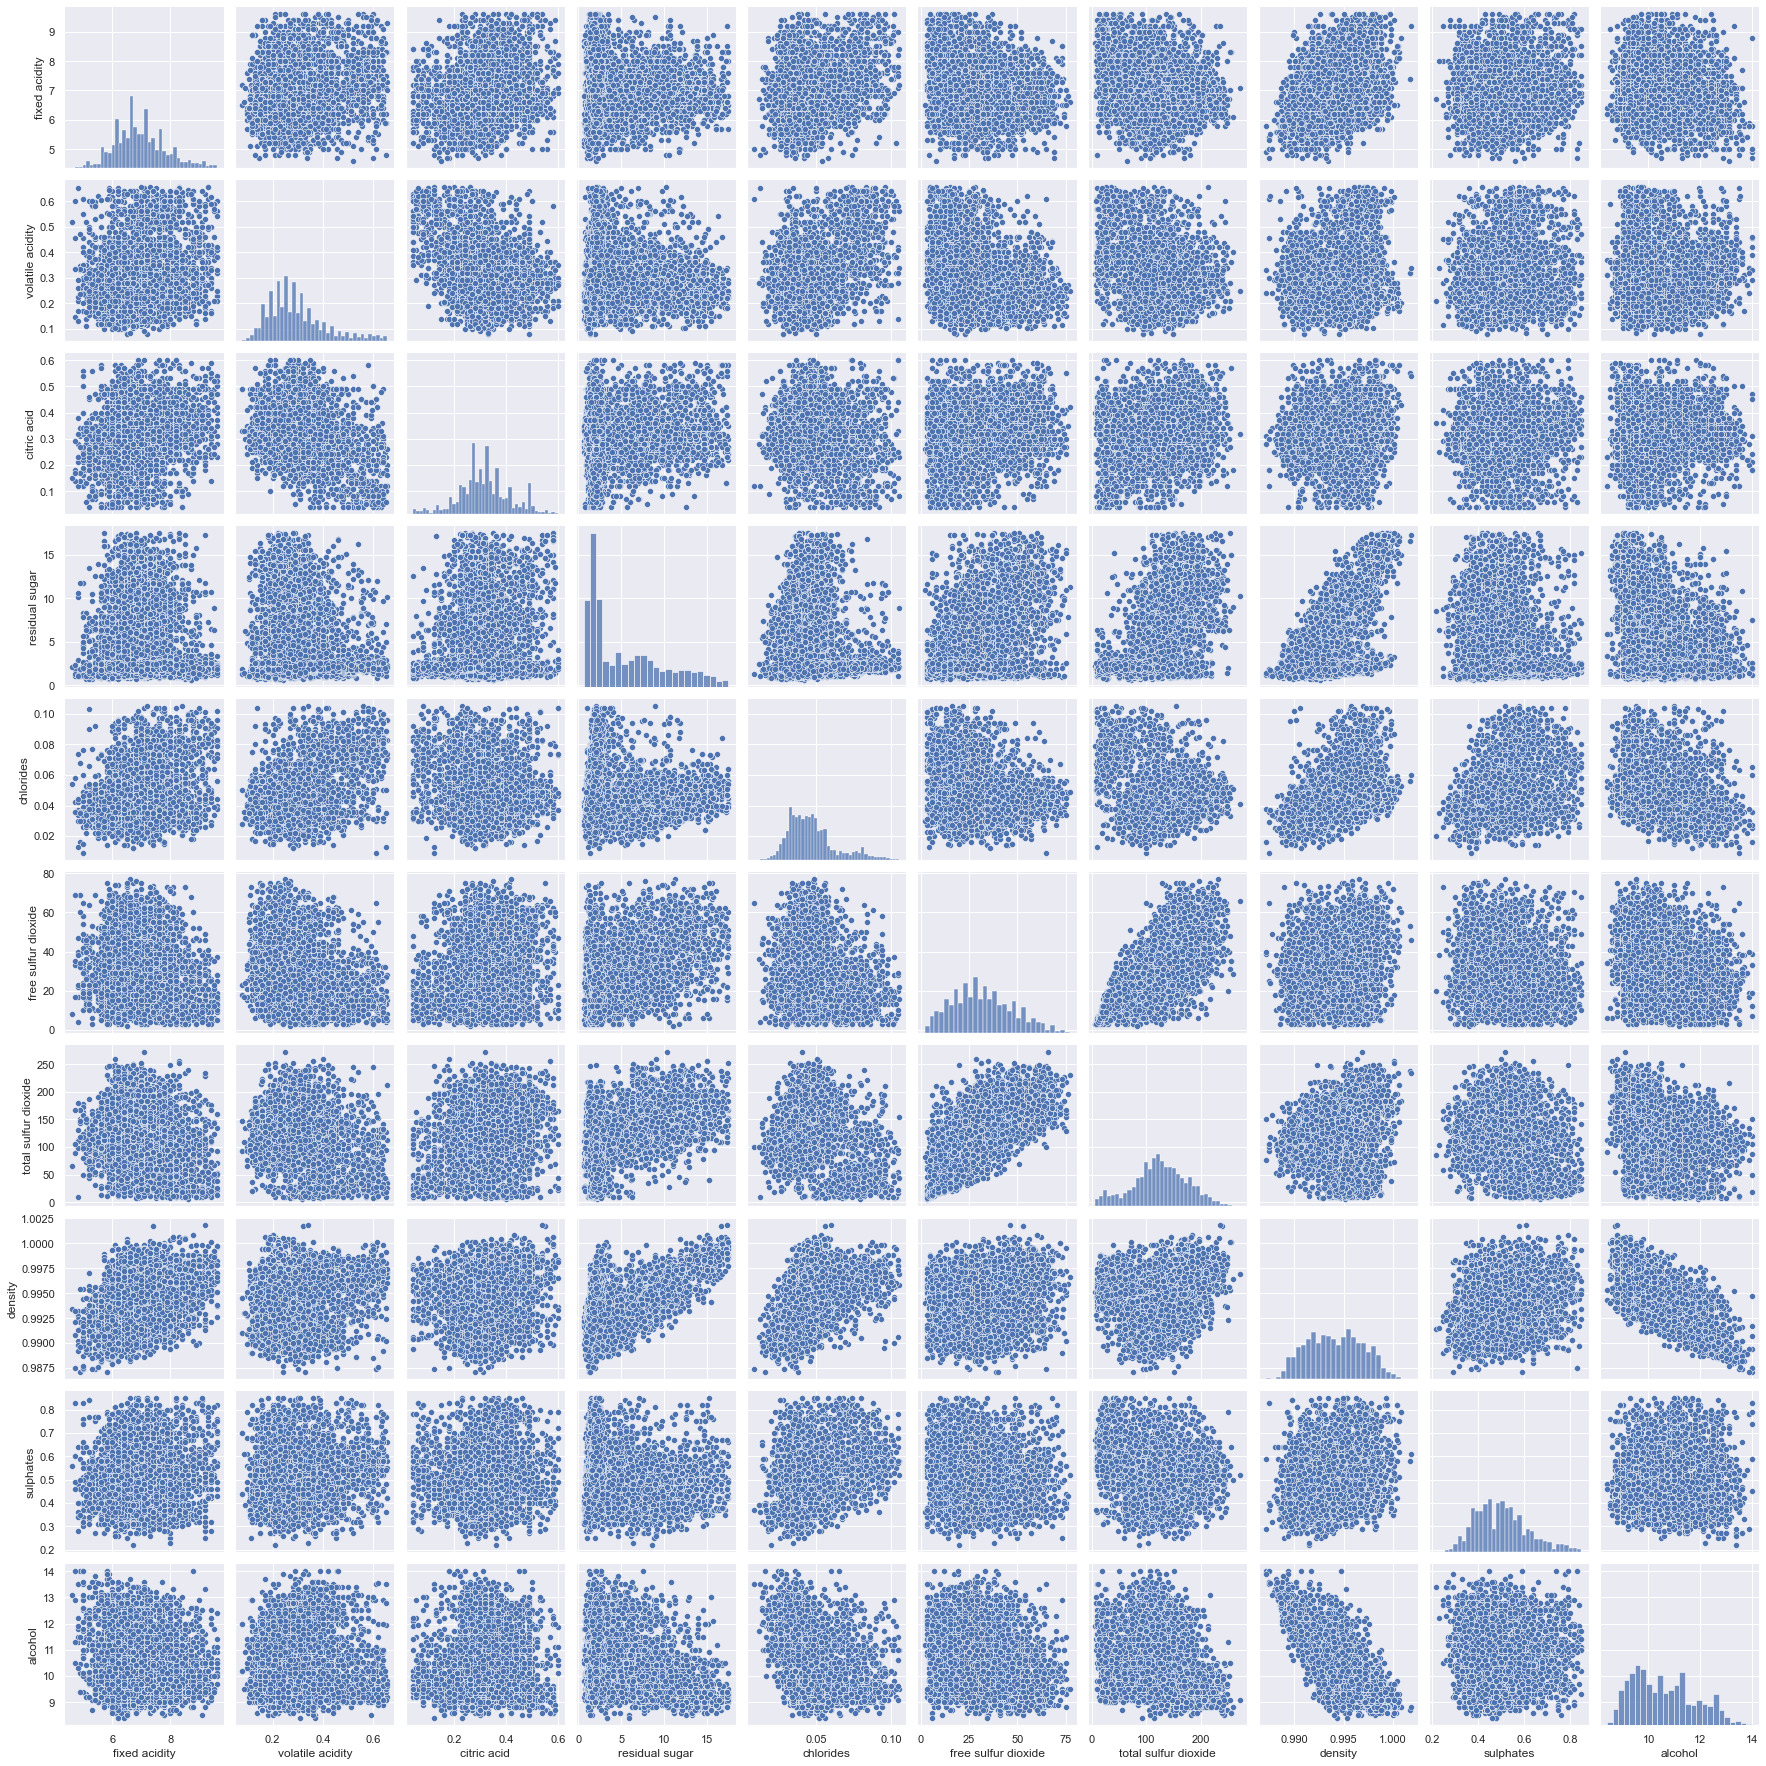

In [33]:
# Scatter Plot Matrix

sns.set()

sns.pairplot(n_df[cols],size=2.5)
plt.show()

In [34]:
### Information of the New Dataframe
n_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5064 entries, 1 to 6497
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5063 non-null   float64
 1   volatile acidity      5064 non-null   float64
 2   citric acid           5064 non-null   float64
 3   residual sugar        5064 non-null   float64
 4   chlorides             5064 non-null   float64
 5   free sulfur dioxide   5064 non-null   float64
 6   total sulfur dioxide  5064 non-null   float64
 7   density               5064 non-null   float64
 8   sulphates             5064 non-null   float64
 9   alcohol               5064 non-null   float64
 10  type                  5064 non-null   object 
 11  pHValue               5064 non-null   object 
 12  taste                 5064 non-null   object 
dtypes: float64(10), object(3)
memory usage: 682.9+ KB


In [42]:
n_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type,pHValue,taste
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,0.49,9.5,white,quite acidic,not good taste
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,0.44,10.1,white,quite acidic,not good taste
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,0.40,9.9,white,very acidic,not good taste
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,0.40,9.9,white,very acidic,not good taste
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,0.44,10.1,white,quite acidic,not good taste
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,red,midly acidic,not good taste
6494,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,red,midly acidic,not good taste
6495,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,red,midly acidic,not good taste
6496,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2,red,midly acidic,not good taste


### Setup dummy variables to take care categorical variables

In [50]:
n_df=pd.get_dummies(n_df,columns=['type','pHValue'])
n_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,taste,type_red,type_white,pHValue_acidic,pHValue_extremly acidic,pHValue_lightly acidic,pHValue_midly acidic,pHValue_quite acidic,pHValue_very acidic
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,0.49,9.5,not good taste,0,1,0,0,0,0,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,0.44,10.1,not good taste,0,1,0,0,0,0,1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,0.40,9.9,not good taste,0,1,0,0,0,0,0,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,0.40,9.9,not good taste,0,1,0,0,0,0,0,1
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,0.44,10.1,not good taste,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,not good taste,1,0,0,0,0,1,0,0
6494,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,not good taste,1,0,0,0,0,1,0,0
6495,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,not good taste,1,0,0,0,0,1,0,0
6496,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2,not good taste,1,0,0,0,0,1,0,0


In [53]:
n_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol', 'taste', 'type_red', 'type_white',
       'pHValue_acidic', 'pHValue_extremly acidic', 'pHValue_lightly acidic',
       'pHValue_midly acidic', 'pHValue_quite acidic', 'pHValue_very acidic'],
      dtype='object')

In [94]:
X=n_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol','type_red', 'type_white',
       'pHValue_acidic', 'pHValue_extremly acidic', 'pHValue_lightly acidic',
       'pHValue_midly acidic', 'pHValue_quite acidic', 'pHValue_very acidic']]
Y=n_df['taste']

### Now Spliting Data into train&test

In [95]:
### Using Stratified Sampling(Same Proportions of classes)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)

In [64]:
## Shape of the Splits

print(f'X_train--> {X_train.shape}')
print(f'X_test--> {X_test.shape}')
print(f'Y_train--> {Y_train.shape}')
print(f'Y_test--> {Y_test.shape}')

X_train--> (4051, 18)
X_test--> (1013, 18)
Y_train--> (4051,)
Y_test--> (1013,)


### Normalize numerical features

In [96]:
## Using Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train=np.nan_to_num(X_train)

### Implementing the Models

In [170]:
acc=list()
f1=list()
name=list()

[[ 59 162]
 [ 40 752]]
                precision    recall  f1-score   support

          good       0.60      0.27      0.37       221
not good taste       0.82      0.95      0.88       792

      accuracy                           0.80      1013
     macro avg       0.71      0.61      0.63      1013
  weighted avg       0.77      0.80      0.77      1013

Accuracy: 80.05923000987167
F1 Score: Good Class--> 0.36874999999999997 Not Good Taste--> 0.8815943728018758


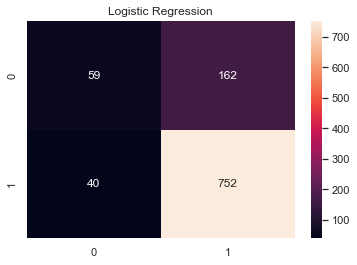

In [171]:
## Logistic Regression

Logistic_classifier=LogisticRegression(random_state=0)
Logistic_classifier.fit(X_train,Y_train)

# Now Test the model

y_pred=Logistic_classifier.predict(X_test)

cm=confusion_matrix(Y_test,y_pred)
print(cm)

# Report of Classification: Precision, Recall, F-measure, report,accuracy
print(classification_report(Y_test,y_pred))

# Ploting with heatmap


sns.heatmap(cm,annot=True,fmt='d')
title = 'Logistic Regression'
plt.title(title)
plt.plot()

f1_s=f1_score(Y_test,y_pred,average=None)

a=accuracy_score(Y_test, y_pred)*100
acc.append(a)
name.append('LR')
f1.append(f1_s)
print(f'Accuracy: {a}')
print(f'F1 Score: Good Class--> {f1_s[0]} Not Good Taste--> {f1_s[1]}')

[[140  81]
 [ 77 715]]
                precision    recall  f1-score   support

          good       0.65      0.63      0.64       221
not good taste       0.90      0.90      0.90       792

      accuracy                           0.84      1013
     macro avg       0.77      0.77      0.77      1013
  weighted avg       0.84      0.84      0.84      1013

Accuracy: 84.40276406712735
F1 Score: Good Class--> 0.6392694063926941 Not Good Taste--> 0.9005037783375316


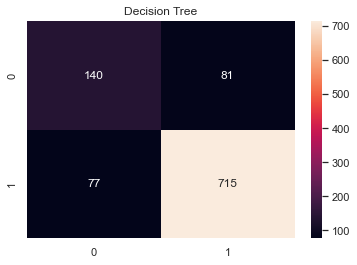

In [172]:
## Decision Tree


DT_classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
DT_classifier.fit(X_train,Y_train)

y_pred=DT_classifier.predict(X_test)


cm=confusion_matrix(Y_test,y_pred)
print(cm)

# Report of Classification: Precision, Recall, F-measure, report,accuracy
print(classification_report(Y_test,y_pred))

# Ploting with heatmap 


sns.heatmap(cm,annot=True,fmt='d')
title = 'Decision Tree'
plt.title(title)
plt.plot()
a=accuracy_score(Y_test, y_pred)*100
acc.append(a)
name.append('DT')
print(f'Accuracy: {a}')
f1_s=f1_score(Y_test,y_pred,average=None)
f1.append(f1_s)
print(f'F1 Score: Good Class--> {f1_s[0]} Not Good Taste--> {f1_s[1]}')

[[ 67 154]
 [ 22 770]]
                precision    recall  f1-score   support

          good       0.75      0.30      0.43       221
not good taste       0.83      0.97      0.90       792

      accuracy                           0.83      1013
     macro avg       0.79      0.64      0.66      1013
  weighted avg       0.82      0.83      0.80      1013

Accuracy: 82.62586377097729
F1 Score: Good Class--> 0.432258064516129 Not Good Taste--> 0.8974358974358975


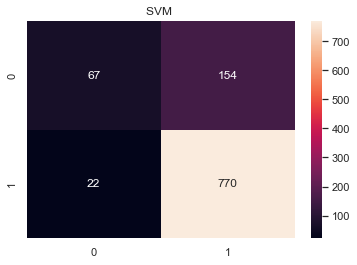

In [173]:
##SVM

from sklearn.svm import SVC
SVM_classifier = SVC(kernel="rbf",random_state=0)
SVM_classifier.fit(X_train, Y_train)

SVM_classifier.fit(X_train, Y_train)


y_pred=SVM_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(Y_test,y_pred)
print(cm)

# Report of Classification: Precision, Recall, F-measure, report,accuracy
print(classification_report(Y_test,y_pred))

# Ploting with heatmap

import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
title = 'SVM '
plt.title(title)
plt.plot()


a=accuracy_score(Y_test, y_pred)*100
acc.append(a)
name.append('SVM')

print(f'Accuracy: {a}')
f1_s=f1_score(Y_test,y_pred,average=None)
f1.append(f1_s)
print(f'F1 Score: Good Class--> {f1_s[0]} Not Good Taste--> {f1_s[1]}')

[[130  91]
 [ 49 743]]
                precision    recall  f1-score   support

          good       0.73      0.59      0.65       221
not good taste       0.89      0.94      0.91       792

      accuracy                           0.86      1013
     macro avg       0.81      0.76      0.78      1013
  weighted avg       0.85      0.86      0.86      1013

Accuracy: 86.1796643632774
F1 Score: Good Class--> 0.6500000000000001 Not Good Taste--> 0.9138991389913899


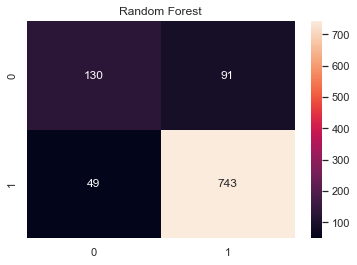

In [187]:
## Random Forest

Random_classifier=RandomForestClassifier(n_estimators=9,criterion='entropy',random_state=0)
Random_classifier.fit(X_train,Y_train)

y_pred=Random_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(Y_test,y_pred)
print(cm)

# Report of Classification: Precision, Recall, F-measure, report,accuracy
print(classification_report(Y_test,y_pred))

# Ploting with heatmap 

import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
title = 'Random Forest'
plt.title(title)
plt.plot()
a=accuracy_score(Y_test, y_pred)*100
acc.append(a)
name.append('RF')
print(f'Accuracy: {a}')
f1_s=f1_score(Y_test,y_pred,average=None)
f1.append(f1_s)
print(f'F1 Score: Good Class--> {f1_s[0]} Not Good Taste--> {f1_s[1]}')

[[154  67]
 [243 549]]
                precision    recall  f1-score   support

          good       0.39      0.70      0.50       221
not good taste       0.89      0.69      0.78       792

      accuracy                           0.69      1013
     macro avg       0.64      0.70      0.64      1013
  weighted avg       0.78      0.69      0.72      1013

Accuracy: 69.39782823297136
F1 Score: Good Class--> 0.49838187702265374 Not Good Taste--> 0.7798295454545455


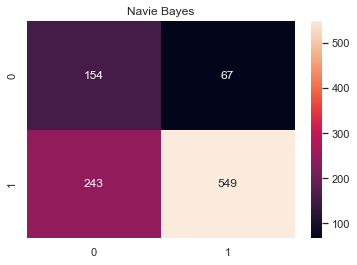

In [175]:
Navie_classifier = GaussianNB()
Navie_classifier.fit(X_train, Y_train)


y_pred=Navie_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(Y_test,y_pred)
print(cm)

# Report of Classification: Precision, Recall, F-measure, report,accuracy
print(classification_report(Y_test,y_pred))

# Ploting with heatmap 

import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
title = 'Navie Bayes'
plt.title(title)
plt.plot()

a=accuracy_score(Y_test, y_pred)*100
acc.append(a)
name.append('Naive Bayes')
print(f'Accuracy: {a}')
f1_s=f1_score(Y_test,y_pred,average=None)
f1.append(f1_s)
print(f'F1 Score: Good Class--> {f1_s[0]} Not Good Taste--> {f1_s[1]}')

[]

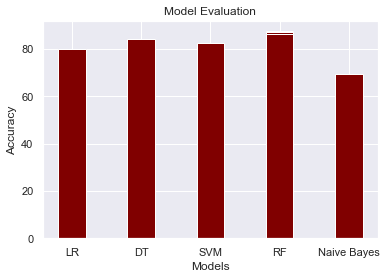

In [148]:
plt.bar(name,acc,color='maroon',width=0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Evaluation')
plt.plot()

<AxesSubplot:title={'center':'Class distribution'}, xlabel='taste'>

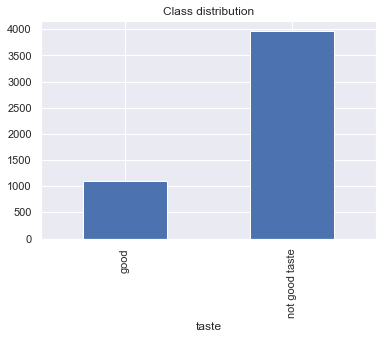

In [154]:
## See this we have imbalanced Dataset

n_df.pivot_table(index='taste', aggfunc='size').plot(kind='bar', title = 'Class distribution')

* In case of imbalanced Dataset we didn't trust on Accuracy we trust on F1-Score
* The highest F1-Score of Good Taste is 65% and Not good Taste is 91% because of imbalanced Dataset 

In [178]:
good_taste_f1=list()
not_good_taste_f1=list()
for i in f1:
    good_taste_f1.append(i[0])
    not_good_taste_f1.append(i[1])

[]

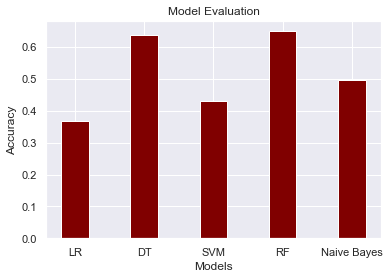

In [181]:
plt.bar(name,good_taste_f1,color='maroon',width=0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Evaluation')
plt.plot()

[]

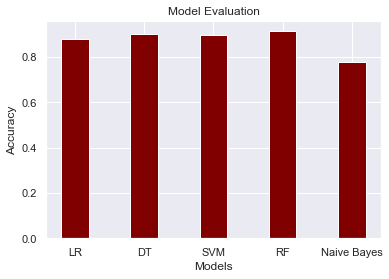

In [182]:
plt.bar(name,not_good_taste_f1,color='maroon',width=0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Evaluation')
plt.plot()

***You should have also done the following***

* Try at least 3 models you have learned in class such as Logistic, Decision Tree, Random Forecast.
* Compare the sklearn Decision Tree with your own Decision Tree implementation results
* Include at least one ensemble models
* Identify out of all those you have tried, which one is the best model.

In [191]:
n_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,taste,type_red,type_white,pHValue_acidic,pHValue_extremly acidic,pHValue_lightly acidic,pHValue_midly acidic,pHValue_quite acidic,pHValue_very acidic
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,not good taste,0,1,0,0,0,0,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,not good taste,0,1,0,0,0,0,1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,not good taste,0,1,0,0,0,0,0,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,not good taste,0,1,0,0,0,0,0,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,not good taste,0,1,0,0,0,0,1,0


In [194]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type_red,type_white,pHValue_acidic,pHValue_extremly acidic,pHValue_lightly acidic,pHValue_midly acidic,pHValue_quite acidic,pHValue_very acidic
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,0.49,9.5,0,1,0,0,0,0,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,0.44,10.1,0,1,0,0,0,0,1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,0.40,9.9,0,1,0,0,0,0,0,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,0.40,9.9,0,1,0,0,0,0,0,1
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,0.44,10.1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,1,0,0,0,0,1,0,0
6494,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,1,0,0,0,0,1,0,0
6495,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,1,0,0,0,0,1,0,0
6496,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,0.71,10.2,1,0,0,0,0,1,0,0


***And answer the following questions based on what you observe from your model building process***

* For the best fitted model, does it work better for the Red wine or White wine or similar
* Can ensemble methods improve your models?
* Whether the categorical variable pH Value is important or not. If it is important, and you need to make a prediction for one instance where the pH value is missing, how would you proceed?

* Random Forest Classifier is best in our case
* No if our Dataset is Balanced Dataset then it is possible the other models work better
* Yes Random Forest is a Ensemble methods is improve our model
* Yes pH value is important for proceeding if pH value is missing let take example eg Random_classifier.predict([0.17297758, -0.33190212,  0.24773165,  1.96154966,  1.21824058,0.19548849,  1.28638457,  1.61392447,  0.20503508, -1.22902996,-0.39133804,  0.39133804,0,0,0])